Analyzing the results

In [1]:
import matplotlib.pyplot as plt

In [79]:
with open('formatted_results.csv', 'r', encoding="utf-8") as file:
    header = file.readline().strip().split(',')
    
    data = {'testLoop':{}, 'testNaive':{}, 'testStrassen':{}}
    
    for line in file:
        values = line.strip().split(',')
        key = values[0].split(':')[0].split('.')[1]
        if key not in data.keys():
            data[key] = {}
        
        measure = values[0].split(':')[1] if len(values[0].split(':')) > 1 else 'avgTime'

        if measure not in data[key]:
            data[key][measure] = {'size':[], 'score':[], 'error':[], 'units':[]}
        
        data[key][measure]['size'].append(values[1])
        data[key][measure]['score'].append(values[4])

        if(len(values)>6):
            data[key][measure]['error'].append(values[6])
            
        data[key][measure]['units'].append(values[-1])


In [80]:
for column, values in data.items():
    print(f'{column}: {values}')

testLoop: {'avgTime': {'size': ['64', '128', '256', '512', '1024'], 'score': ['0.247', '2.320', '30.212', '232.637', '3541.855'], 'error': ['0.034', '0.534', '40.250', '39.569', '1929.401'], 'units': ['ms/op', 'ms/op', 'ms/op', 'ms/op', 'ms/op']}, '·gc.alloc.rate': {'size': ['64', '128', '256', '512', '1024'], 'score': ['125.203', '52.459', '17.326', '8.245', '2.205'], 'error': ['16.869', '11.343', '19.988', '1.322', '1.194'], 'units': ['MB/sec', 'MB/sec', 'MB/sec', 'MB/sec', 'MB/sec']}, '·gc.alloc.rate.norm': {'size': ['64', '128', '256', '512', '1024'], 'score': ['34066.877', '133660.345', '529479.309', '2107547.107', '8409228.533'], 'error': ['1.324', '2.852', '231.554', '1117.271', '80.963'], 'units': ['B/op', 'B/op', 'B/op', 'B/op', 'B/op']}, '·gc.churn.G1_Eden_Space': {'size': ['64', '128', '256', '512'], 'score': ['123.824', '56.273', '16.835', '5.491'], 'error': ['59.314', '0.174', '59.177', '47.276'], 'units': ['MB/sec', 'MB/sec', 'MB/sec', 'MB/sec']}, '·gc.churn.G1_Eden_Space

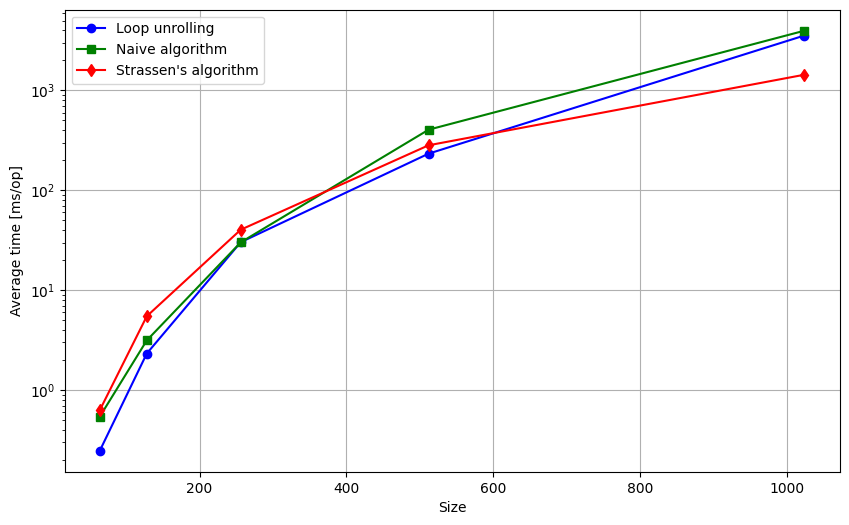

In [87]:
test_types = ['testLoop', 'testNaive', 'testStrassen']
markers = ['o', 's', 'd']  # Different markers for each test type
colors = ['b', 'g', 'r']  # Different colors for each test type
labels = ['Loop unrolling', 'Naive algorithm', 'Strassen\'s algorithm']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop over each test type and plot the data
for test_type, marker, color, label in zip(test_types, markers, colors, labels):
    sizes = [int(size) for size in data[test_type]['avgTime']['size']]
    scores = [float(score) for score in data[test_type]['avgTime']['score']]
    
    # Plot the data for this test type
    plt.plot(sizes, scores, marker=marker, linestyle='-', color=color, label=label)

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Average time [ms/op]')
plt.yscale('log')
# plt.xscale('log')

# Add grid, legend, and display the plot
plt.grid(True)
plt.legend()
plt.show()

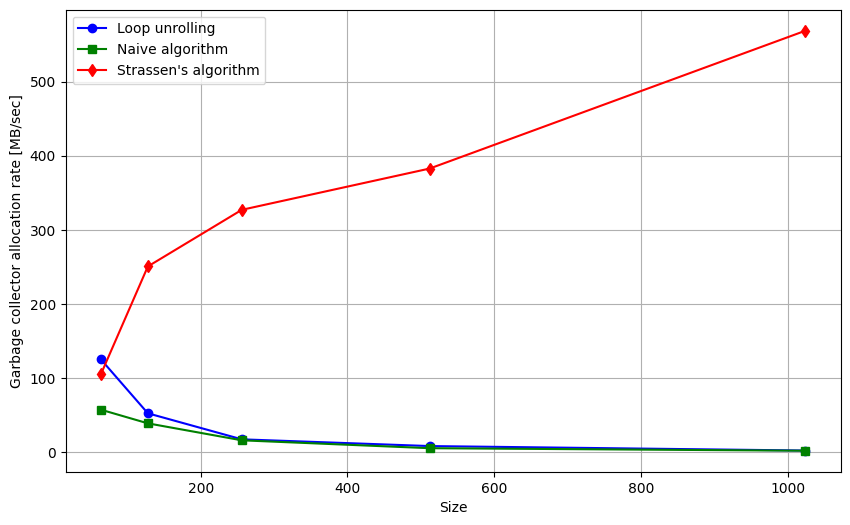

In [85]:
test_types = ['testLoop', 'testNaive', 'testStrassen']
markers = ['o', 's', 'd']  # Different markers for each test type
colors = ['b', 'g', 'r']  # Different colors for each test type
labels = ['Loop unrolling', 'Naive algorithm', 'Strassen\'s algorithm']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop over each test type and plot the data
for test_type, marker, color, label in zip(test_types, markers, colors, labels):
    sizes = [int(size) for size in data[test_type]['·gc.alloc.rate']['size']]
    scores = [float(score) for score in data[test_type]['·gc.alloc.rate']['score']]
    
    # Plot the data for this test type
    plt.plot(sizes, scores, marker=marker, linestyle='-', color=color, label=label)

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Garbage collector allocation rate [MB/sec]')

# Add grid, legend, and display the plot
plt.grid(True)
plt.legend()
plt.show()

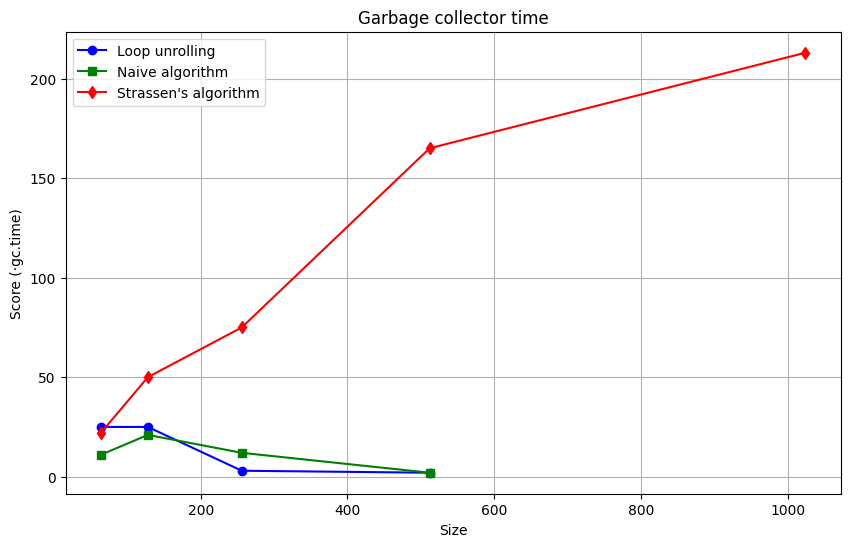

In [84]:
test_types = ['testLoop', 'testNaive', 'testStrassen']
markers = ['o', 's', 'd']  # Different markers for each test type
colors = ['b', 'g', 'r']  # Different colors for each test type
labels = ['Loop unrolling', 'Naive algorithm', 'Strassen\'s algorithm']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop over each test type and plot the data
for test_type, marker, color, label in zip(test_types, markers, colors, labels):
    sizes = [int(size) for size in data[test_type]['·gc.time']['size']]
    scores = [float(score) for score in data[test_type]['·gc.time']['score']]
    
    # Plot the data for this test type
    plt.plot(sizes, scores, marker=marker, linestyle='-', color=color, label=label)

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Score (·gc.time)')
plt.title('Garbage collector time')

# Add grid, legend, and display the plot
plt.grid(True)
plt.legend()
plt.show()

Sparsity calculations

In [40]:
data = [
    ('dwt_193', 193, 3493),
    ('fs_183_3', 183, 1069),
    ('fs_183_6', 183, 1000),
    ('gre_185', 185, 975),
    ('will199', 199, 701),
    ('ipcol_a', 207, 572)
]

for element in data:
    sparsity = 1 - (element[2] / (element[1]**2))
    print(element[0], '-', sparsity)

dwt_193 - 0.9062256704877983
fs_183_3 - 0.9680790707396458
fs_183_6 - 0.9701394487742244
gre_185 - 0.9715120525931337
will199 - 0.9822984268074039
ipcol_a - 0.9866507969847604


In [16]:
with open('formatted_results_sparse.csv', 'r', encoding="utf-8") as file:
    header = file.readline().strip().split(',')
    
    data = {'testMatrix':{}, 'testMatrixArray':{}}
    
    for line in file:
        values = line.strip().split(',')
        key = values[0].split(':')[0].split('.')[1]
        if key not in data.keys():
            data[key] = {}
        
        measure = values[0].split(':')[1] if len(values[0].split(':')) > 1 else 'avgTime'

        if measure not in data[key]:
            data[key][measure] = {'size':[], 'score':[], 'error':[], 'units':[]}
        
        data[key][measure]['size'].append(values[1])
        data[key][measure]['score'].append(values[4])

        if(len(values)>6):
            data[key][measure]['error'].append(values[6])
            
        data[key][measure]['units'].append(values[-1])


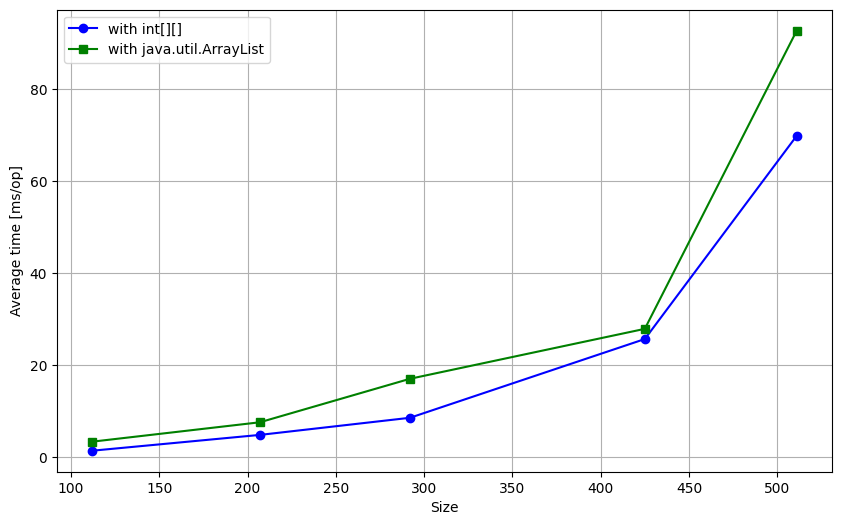

In [18]:
test_types = ['testMatrix', 'testMatrixArray']
markers = ['o', 's']
colors = ['b', 'g']
testName = ['with int[][]', 'with java.util.ArrayList']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop over each test type and plot the data
for test_type, marker, color, label in zip(test_types, markers, colors, testName):
    sizes = [int(size) for size in data[test_type]['avgTime']['size']]
    scores = [float(score) for score in data[test_type]['avgTime']['score']]
    
    plt.plot(sizes, scores, marker=marker, linestyle='-', color=color, label=label)

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Average time [ms/op]')

# Add grid, legend, and display the plot
plt.grid(True)
plt.legend()
plt.show()

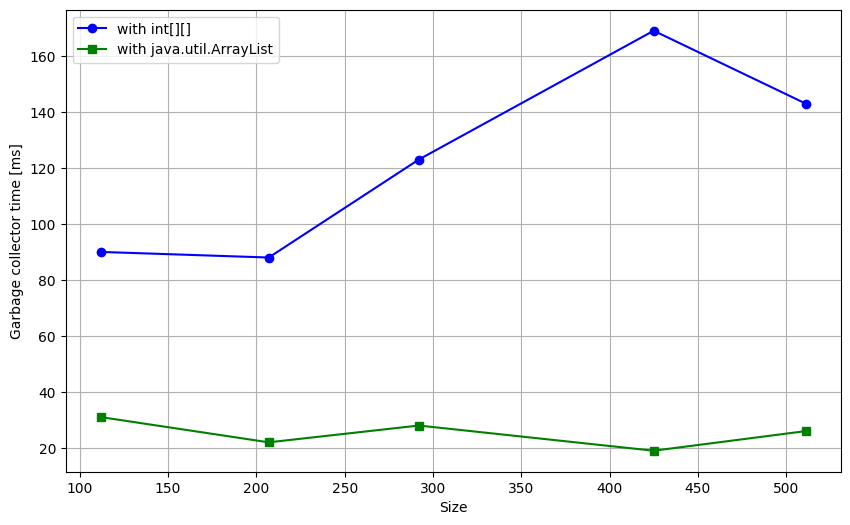

In [20]:
test_types = ['testMatrix', 'testMatrixArray']
markers = ['o', 's']
colors = ['b', 'g']
testName = ['with int[][]', 'with java.util.ArrayList']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop over each test type and plot the data
for test_type, marker, color, label in zip(test_types, markers, colors, testName):
    sizes = [int(size) for size in data[test_type]['·gc.time']['size']]
    scores = [float(score) for score in data[test_type]['·gc.time']['score']]
    
    # Plot the data for this test type
    plt.plot(sizes, scores, marker=marker, linestyle='-', color=color, label=label)

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Garbage collector time [ms]')

# Add grid, legend, and display the plot
plt.grid(True)
plt.legend()
plt.show()

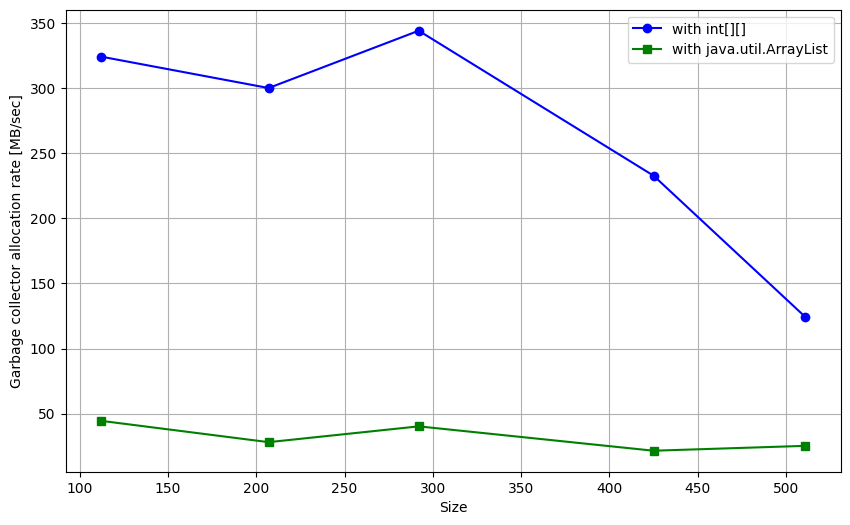

In [21]:
test_types = ['testMatrix', 'testMatrixArray']
markers = ['o', 's']
colors = ['b', 'g']
testName = ['with int[][]', 'with java.util.ArrayList']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop over each test type and plot the data
for test_type, marker, color, label in zip(test_types, markers, colors, testName):
    sizes = [int(size) for size in data[test_type]['·gc.alloc.rate']['size']]
    scores = [float(score) for score in data[test_type]['·gc.alloc.rate']['score']]
    
    # Plot the data for this test type
    plt.plot(sizes, scores, marker=marker, linestyle='-', color=color, label=label)

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Garbage collector allocation rate [MB/sec]')

# Add grid, legend, and display the plot
plt.grid(True)
plt.legend()
plt.show()

## Sparsity levels

In [49]:
with open('formatted_results_sparse_lev.csv', 'r', encoding="utf-8") as file:
    header = file.readline().strip().split(',')
    
    data = {'testMatrix':{}}
    
    for line in file:
        values = line.strip().split(',')
        key = values[0].split(':')[0].split('.')[1]
        if key not in data.keys():
            data[key] = {}
        
        measure = values[0].split(':')[1] if len(values[0].split(':')) > 1 else 'avgTime'

        if measure not in data[key]:
            data[key][measure] = {'size':[], 'score':[], 'error':[], 'units':[]}
        
        data[key][measure]['size'].append(values[1])
        data[key][measure]['score'].append(values[4])

        if(len(values)>6):
            data[key][measure]['error'].append(values[6])
            
        data[key][measure]['units'].append(values[-1])

In [50]:
print(data)

{'testMatrix': {'avgTime': {'size': ['0.91', '0.96', '0.970', '0.971', '0.982', '0.986'], 'score': ['10.083', '6.079', '11.445', '3.591', '3.845', '2.886'], 'error': ['2.557', '6.128', '24.252', '0.216', '6.405', '0.945'], 'units': ['ms/op', 'ms/op', 'ms/op', 'ms/op', 'ms/op', 'ms/op']}, '·gc.alloc.rate': {'size': ['0.91', '0.96', '0.970', '0.971', '0.982', '0.986'], 'score': ['127.319', '195.572', '121.448', '321.153', '379.409', '495.267'], 'error': ['34.407', '181.921', '219.953', '19.606', '413.060', '164.695'], 'units': ['MB/sec', 'MB/sec', 'MB/sec', 'MB/sec', 'MB/sec', 'MB/sec']}, '·gc.alloc.rate.norm': {'size': ['0.91', '0.96', '0.970', '0.971', '0.982', '0.986'], 'score': ['1409122.842', '1245804.302', '1245803.888', '1270009.600', '1452730.616', '1565090.268'], 'error': ['52.817', '36.497', '49.879', '26.013', '42.070', '57.215'], 'units': ['B/op', 'B/op', 'B/op', 'B/op', 'B/op', 'B/op']}, '·gc.churn.G1_Eden_Space': {'size': ['0.91', '0.96', '0.970', '0.971', '0.982', '0.986']

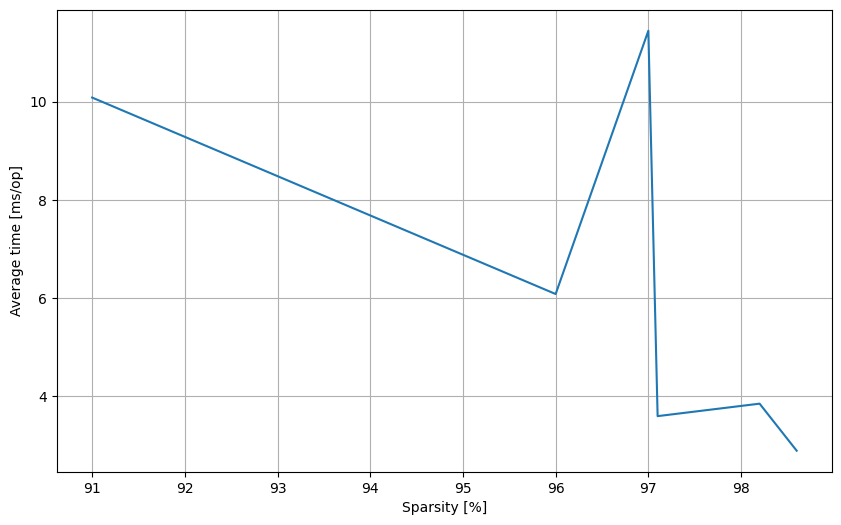

In [51]:
# Initialize the plot
plt.figure(figsize=(10, 6))

sizes = [float(size)*100 for size in data['testMatrix']['avgTime']['size']]
scores = [float(score) for score in data['testMatrix']['avgTime']['score']]
    
plt.plot(sizes, scores, linestyle='-')

# Add labels and title
plt.xlabel('Sparsity [%]')
plt.ylabel('Average time [ms/op]')

# Add grid, legend, and display the plot
plt.grid(True)
plt.show()

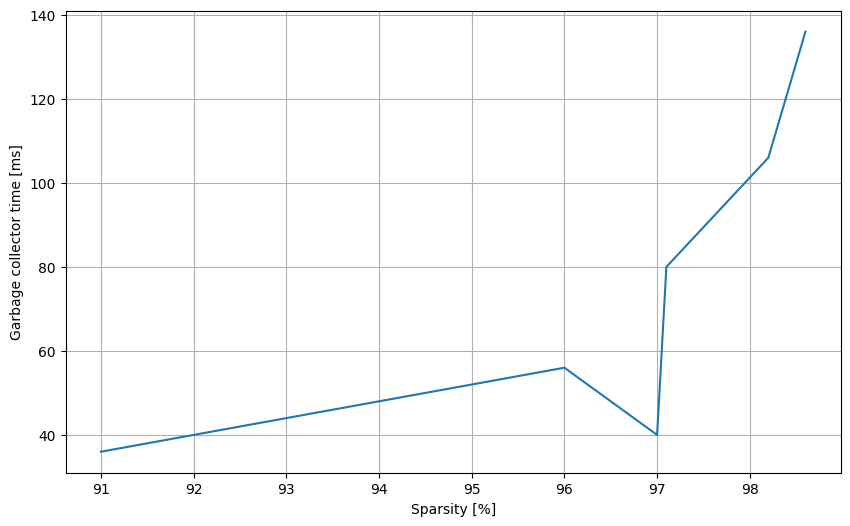

In [52]:
# Initialize the plot
plt.figure(figsize=(10, 6))

sizes = [float(size)*100 for size in data['testMatrix']['·gc.time']['size']]
scores = [float(score) for score in data['testMatrix']['·gc.time']['score']]
    
    # Plot the data for this test type
plt.plot(sizes, scores, linestyle='-')

# Add labels and title
plt.xlabel('Sparsity [%]')
plt.ylabel('Garbage collector time [ms]')

plt.grid(True)
plt.show()

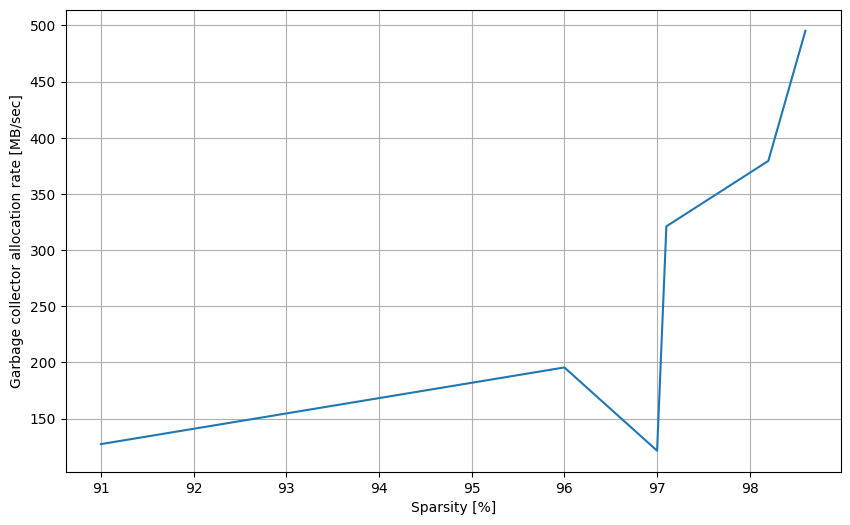

In [53]:
plt.figure(figsize=(10, 6))

sizes = [float(size)*100 for size in data['testMatrix']['·gc.alloc.rate']['size']]
scores = [float(score) for score in data['testMatrix']['·gc.alloc.rate']['score']]

plt.plot(sizes, scores, linestyle='-')
plt.xlabel('Sparsity [%]')
plt.ylabel('Garbage collector allocation rate [MB/sec]')
plt.grid(True)
plt.show()